<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    38.821177  32.628243  40.152353 -0.000245  121.601528   
      1.0    68.477009  84.476629  54.363894  0.000260  217.317793   
      2.0    22.261859  83.135061  88.759347 -0.000316  204.155951   
      3.0    74.824482  84.625636  66.577499 -0.000044  236.027572   
      4.0    69.160169  60.625512  70.465660 -0.000170  210.251171   
...                ...        ...        ...       ...         ...   
999.0 55.0   57.510733  44.679858  34.252478  0.000889  146.443959   
      56.0   40.117201  84.149688  99.701160 -0.000109  233.967940   
      57.0   24.655895  66.287601  53.278781 -0.000081  154.222195   
      58.0   60.411761  30.995031  72.315206  0.001048  173.723046   
      59.0   74.764585  28.096142  43.815382 -0.005407  156.670702   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    121.601617 -0.000089  
      1.0    217.317554  0.000239  
      2.0    204.156166 -0.000215  
      3.0    236.027795 -0.000222  
      4.0    210.251595 -0.000424  
...                 ...       ...  
999.0 55.0   146.442501  0.001458  
      56.0   233.968906 -0.000966  
      57.0   154.222899 -0.000704  
      58.0   173.721594  0.001453  
      59.0   156.675052 -0.004349  

[60000 rows x 7 columns]

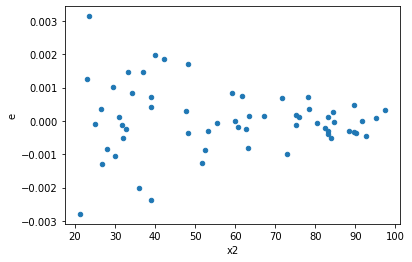

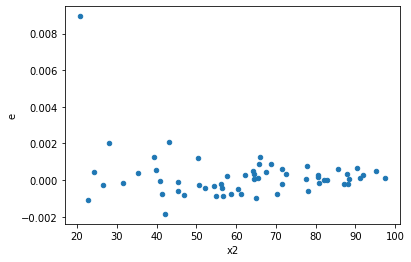

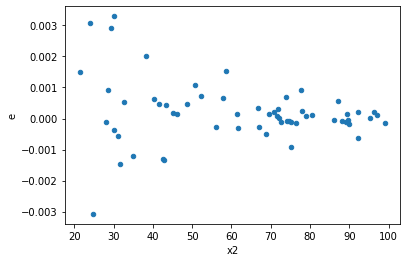

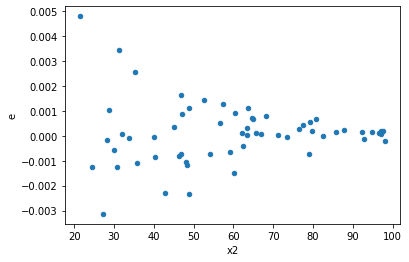

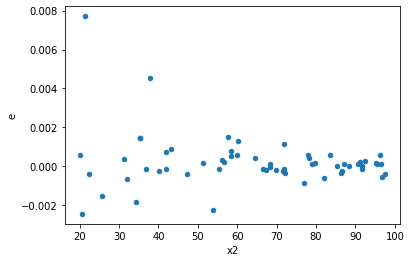

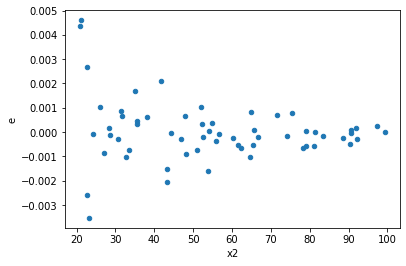

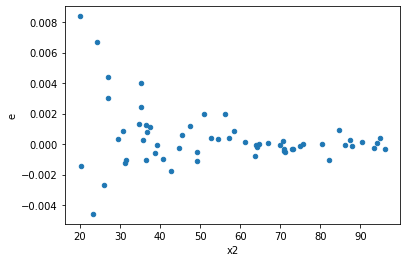

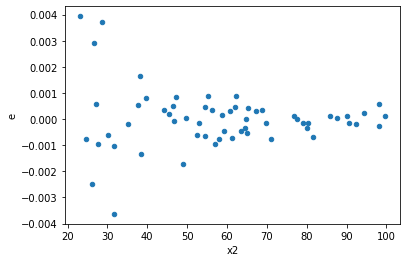

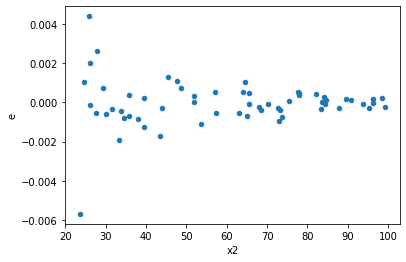

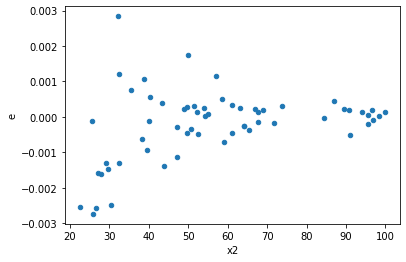

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,21.0,21.0,3.811930107152987e-05,4.243555062970734e-05,1.8152048129299938e-06,2.02074050617654e-06,1.113230028800322,0.80815126646098,0.59592436676951,0.40407563323049,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,3.0433644418358314e-05,4.589652080734079e-05,1.4492211627789674e-06,2.185548609873371e-06,1.5080849396944027,0.35391764364845213,0.8230411781757739,0.17695882182422606,Reject001=1 : Homoscedasticity
42.0,21.0,21.0,4.219689275603487e-05,7.574017754820692e-05,2.00937584552547e-06,3.606675121343187e-06,1.7949230998146135,0.1884059227255599,0.90579703863722,0.09420296136277995,Reject001=1 : Homoscedasticity
76.0,21.0,21.0,1.4396720257552608e-05,2.2500731094136746e-05,6.855581075025051e-07,1.0714633854350832e-06,1.5629067378962738,0.31395326448238503,0.8430233677588075,0.15697663224119252,Reject001=1 : Homoscedasticity
109.0,21.0,21.0,9.615220362233583e-06,5.2324962728718546e-05,4.5786763629683725e-07,2.49166489184374e-06,5.441889083919407,0.0002728360440225064,0.9998635819779887,0.0001364180220112532,Reject001=0 : Heteroscedasticity
205.0,21.0,21.0,1.3194584498378897e-05,3.858120453794948e-05,6.283135475418523e-07,1.8372002160928324e-06,2.924018148710148,0.017536278803626182,0.9912318605981869,0.008768139401813091,Reject001=1 : Homoscedasticity
230.0,21.0,21.0,1.9096500139145845e-05,3.3429352052393254e-05,9.093571494831355e-07,1.5918739072568217e-06,1.7505486245548496,0.2077620646089131,0.8961189676955434,0.10388103230445656,Reject001=1 : Homoscedasticity
247.0,21.0,21.0,2.816892157895953e-05,5.450971011768905e-05,1.3413772180456918e-06,2.5957004817947167e-06,1.9351010639471726,0.13843760369578373,0.9307811981521081,0.06921880184789186,Reject001=1 : Homoscedasticity
307.0,21.0,21.0,3.219311137351717e-05,3.82037556534171e-05,1.5330053035008176e-06,1.8192264596865285e-06,1.186705913888287,0.6984953224777515,0.6507523387611243,0.34924766123887574,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,3.968243726973049e-05,6.893277530187269e-06,1.8896398699871663e-06,3.282513109612985e-07,0.1737110420746615,0.00017764197991295146,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,6.0364731488882595e-05,3.6070149605922916e-06,2.8745110232801236e-06,1.717626171710615e-07,0.059753681854057404,1.685796820925097e-08,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,4.241671617620483e-05,9.213203396488128e-06,2.0198436274383252e-06,4.387239712613394e-07,0.2172068992379142,0.0009327637544081139,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,3.811930107152987e-05,4.243555062970734e-05,1.8152048129299938e-06,2.02074050617654e-06,1.113230028800322,0.80815126646098,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,3.0433644418358314e-05,4.589652080734079e-05,1.4492211627789674e-06,2.185548609873371e-06,1.5080849396944027,0.35391764364845213,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,7.62219234943368e-05,1.1052146021363158e-05,3.6296154044922286e-06,5.2629266768396e-07,0.1449995685583075,4.2620271912662486e-05,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.00011844478032229946,7.374372722076544e-06,5.640227634395212e-06,3.5116060581316873e-07,0.0622600059032587,2.4807517833431502e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,4.2199706775148187e-05,6.337222692032326e-06,2.009509846435628e-06,3.017725091443965e-07,0.15017219730456463,5.653429860066167e-05,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,2.2144540868248714e-05,5.920384534397672e-06,1.0545019461070816e-06,2.8192307306655583e-07,0.2673518755535112,0.0038615213679440083,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    733
Reject001=1 : Homoscedasticity      267
Name: Result_test, dtype: int64